# Hello World: `pdfplumber` basics

## First things first

#### Load the library

In [1]:
import pdfplumber

#### Open the PDF

In [2]:
pdf = pdfplumber.open("../pdfs/00-hello-world.pdf")

#### How many pages in the PDF?

In [3]:
len(pdf.pages)

1

#### Select that first/only page

In [4]:
page = pdf.pages[0]
page

<Page:1>

## Now let's extract the text

In [5]:
page.extract_text()

'Hello, World!'

## Where does that text come from?

The `page.chars` list:

In [6]:
len(page.chars)

13

In [7]:
[char["text"] for char in page.chars]

['H', 'e', 'l', 'l', 'o', ',', ' ', 'W', 'o', 'r', 'l', 'd', '!']

#### What does an individual character look like?

In [8]:
page.chars[0]

{'matrix': (1, 0, 0, 1, 50, 260),
 'fontname': 'Times-Roman',
 'adv': 25.991999999999997,
 'upright': True,
 'x0': 50.0,
 'y0': 252.188,
 'x1': 75.99199999999999,
 'y1': 288.188,
 'width': 25.99199999999999,
 'height': 36.0,
 'size': 36.0,
 'mcid': None,
 'tag': None,
 'object_type': 'char',
 'page_number': 1,
 'ncs': 'DeviceRGB',
 'text': 'H',
 'stroking_color': None,
 'stroking_pattern': None,
 'non_stroking_color': (0.2, 0.5, 0.2),
 'non_stroking_pattern': None,
 'top': 31.812000000000012,
 'bottom': 67.81200000000001,
 'doctop': 31.812000000000012}

## Let's examine the graphical features
(I.e., lines, rectangles, and "curves")

#### Lines

In [9]:
page.lines

[{'x0': 50,
  'y0': 160,
  'x1': 350,
  'y1': 160,
  'width': 300,
  'height': 0,
  'pts': [(50, 160), (350, 160)],
  'linewidth': 0,
  'stroke': True,
  'fill': False,
  'evenodd': False,
  'stroking_color': None,
  'non_stroking_color': None,
  'mcid': None,
  'tag': None,
  'object_type': 'line',
  'page_number': 1,
  'stroking_pattern': None,
  'non_stroking_pattern': None,
  'top': 160,
  'bottom': 160,
  'doctop': 160},
 {'x0': 50,
  'y0': 140,
  'x1': 350,
  'y1': 140,
  'width': 300,
  'height': 0,
  'pts': [(50, 180), (350, 180)],
  'linewidth': 0,
  'stroke': True,
  'fill': False,
  'evenodd': False,
  'stroking_color': None,
  'non_stroking_color': None,
  'mcid': None,
  'tag': None,
  'object_type': 'line',
  'page_number': 1,
  'stroking_pattern': None,
  'non_stroking_pattern': None,
  'top': 180,
  'bottom': 180,
  'doctop': 180}]

#### Rectangles

In [10]:
page.rects

[{'x0': 50,
  'y0': 200,
  'x1': 250,
  'y1': 220,
  'width': 200,
  'height': 20,
  'pts': [(50, 120), (250, 120), (250, 100), (50, 100)],
  'linewidth': 0,
  'stroke': True,
  'fill': True,
  'evenodd': False,
  'stroking_color': (0.25, 0.25, 0.25),
  'non_stroking_color': (0.9, 0.9, 0.9),
  'mcid': None,
  'tag': None,
  'object_type': 'rect',
  'page_number': 1,
  'stroking_pattern': None,
  'non_stroking_pattern': None,
  'top': 100,
  'bottom': 120,
  'doctop': 100}]

#### &ldquo;Curves&rdquo;

(Curves are paths that `(a)` have more than 1 point, and `(b)` do not form a rectangle.)

In [11]:
page.curves

[{'x0': 50,
  'y0': 50,
  'x1': 150,
  'y1': 100,
  'width': 100,
  'height': 50,
  'pts': [(50, 220), (70, 270), (90, 220), (110, 270), (130, 220), (150, 270)],
  'linewidth': 2,
  'stroke': True,
  'fill': False,
  'evenodd': False,
  'stroking_color': None,
  'non_stroking_color': None,
  'mcid': None,
  'tag': None,
  'object_type': 'curve',
  'page_number': 1,
  'stroking_pattern': None,
  'non_stroking_pattern': None,
  'top': 220,
  'bottom': 270,
  'doctop': 220}]

## Let's use the visual debugging tools

The first step is to create an image of the page:

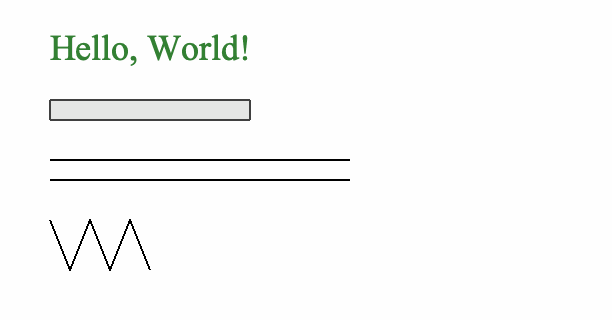

In [12]:
im = page.to_image()
im

From there, we can use the image object's various `.draw_*` methods to see what the PDF parser sees. For example:

#### Flag the `.chars`

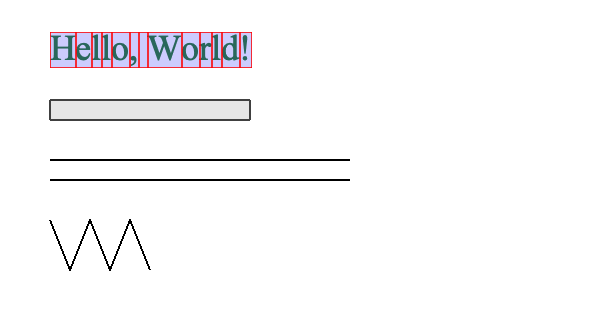

In [13]:
im.draw_rects(page.chars)

#### Reset the image

The things we draw on the page accumulate ... until we call the image's `.reset()` method:

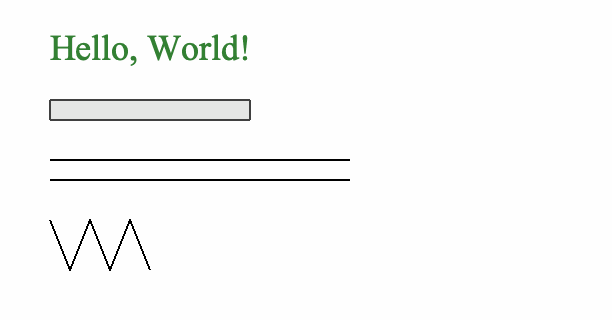

In [14]:
im.reset()

#### Flag the `.rects`

We can also adjust the stroke color/width and fill color, like so:

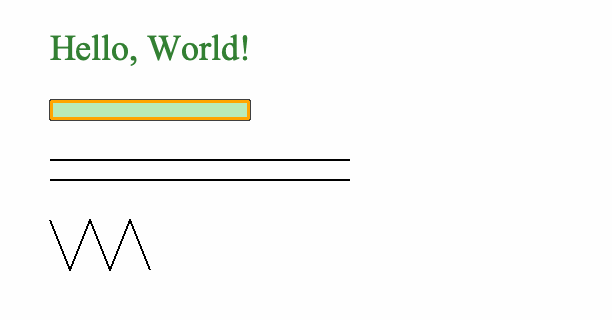

In [15]:
im.reset()
im.draw_rects(
    page.rects,
    stroke="orange",  # Colors can be (standard) names
    fill=(0, 255, 0, 50),  # or RGB(A) tuples, with values 0–255
    stroke_width=3,
)

#### Flag the `.curves`

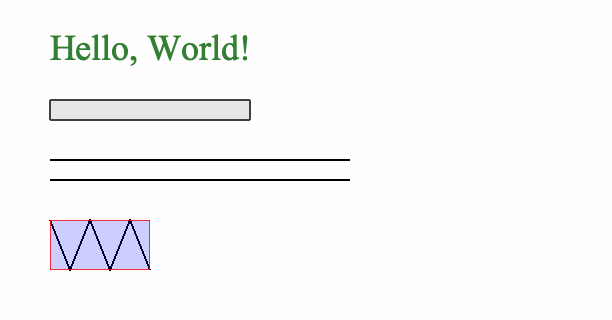

In [16]:
im.reset()
im.draw_rects(page.curves)

## One more key feature: Cropping

When you're parsing a PDF, you often want to focus on just one region of the document. The `page.crop(bounding_box)` method lets you do that.

The method expects to receive a bounding box in the format `(x0, top, x1, bottom)`. Here's an arbitrary example:

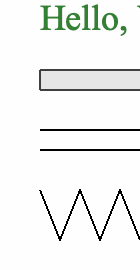

In [17]:
bbox = (10, 30, 150, 300)

page.crop(bbox).to_image()

A more useful technique is to base the bounding box on information you extract from the PDF itself. For instance:

In [18]:
curve = page.curves[0]

curve_bbox = pdfplumber.utils.obj_to_bbox(curve)

print(curve_bbox)

(50, 220, 150, 270)


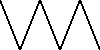

In [19]:
page.crop(curve_bbox).to_image()

We'll use this technique, and others, in the [next notebook](./01-practice.ipynb).

---

---

---